In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df

random.seed(42)
# for synthetic data
VECTOR_LENGTH = 20000

In [2]:
normal_df = pd.read_csv('data/normal1.csv')

In [3]:
normal_df.columns

Index(['length', 'timestamp', 'eth.src', 'eth.dst', 'eth.type', 'ip.src',
       'ip.dst', 'ip.version', 'ip.proto', 'ip.len', 'ip.ihl', 'ip.tos',
       'ip.ttl', 'load.count', 'FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'ECE',
       'CWR', 'UNK', 'source_docker_bridge', 'source_dns', 'source_service',
       'source_pod', 'source_external', 'destination_docker_bridge',
       'destination_dns', 'destination_service', 'destination_pod',
       'destination_external', 'load_0', 'load_1', 'load_2', 'load_3',
       'load_4', 'load_5', 'load_6', 'load_7', 'load_8', 'load_9', 'load_10',
       'load_11', 'load_12', 'load_13', 'load_14', 'load_15', 'load_16',
       'load_17', 'load_18', 'load_19', 'protocol', 'protocol.sport',
       'protocol.dport'],
      dtype='object')

### To generate synthetic data
* length = int(0,1000000)
* timestamp = random 9 digit int (not being used anywhere)
* eth.src = 6a:77:c0:85:72:c3 
..
* eth.type =  2048
* ip.src = 23.412.12.421
* ip.dst = ..
* ip.version = randint(0,10)
* ip.proto = 
* ip.len =int(0,1000000)
* ihs 
* tol 
* ttl
* load.count = ..
* 'FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'ECE',
       'CWR', 'UNK', 'source_docker_bridge', 'source_dns', 'source_service',
       'source_pod', 'source_external', 'destination_docker_bridge',
       'destination_dns', 'destination_service', 'destination_pod',
       'destination_external' .. either 1 or 0
* load_i = one to 16 any value
* protocol = TCP/UDP
* protocol.sport int (0 to 65,535)
* dport ...



In [4]:
synthetic_data = pd.DataFrame()

In [5]:
rand_func = lambda start,end,vec_length: [random.randint(start, end) for x in range(vec_length)]

hex_list = [str(x) for x in range(10)] + ['a','b','c','d','e','f']

def get_hex():
    ret_str = ''
    for i in range(1,18):
        if i %3 == 0:
            ret_str += ':'
        else:
            ret_str += random.choice(hex_list)
    return ret_str

def get_ip_num():
    ret_str = ''
    for i in range(1,8):
        if i %2 == 0:
            ret_str += '.'
        else:
            ret_str += str(int(random.uniform(0,255)))
    return ret_str

get_eth = lambda vec_length:[get_hex() for _ in range(vec_length)] 
get_ip = lambda vec_length:[get_ip_num() for _ in range(vec_length)] 

In [6]:
synthetic_data['length'] = rand_func(0,500000,VECTOR_LENGTH)

In [7]:
synthetic_data['timestamp'] = rand_func(100000,10000000, VECTOR_LENGTH)

In [8]:
#ETHERNET_DATA
synthetic_data['eth.src'] = get_eth(VECTOR_LENGTH)
synthetic_data['eth.dst'] = get_eth(VECTOR_LENGTH)
synthetic_data['eth.type'] = [2048]*VECTOR_LENGTH

In [9]:
#IP_DATA
synthetic_data['ip.src'] = get_ip(VECTOR_LENGTH)
synthetic_data['ip.dst'] = get_ip(VECTOR_LENGTH)
synthetic_data['ip.version'] = rand_func(1,10,VECTOR_LENGTH)
synthetic_data['ip.proto'] = rand_func(1,10,VECTOR_LENGTH)
synthetic_data['ip.len'] = rand_func(1,100000,VECTOR_LENGTH)
synthetic_data['ip.ihl'] = rand_func(1,10,VECTOR_LENGTH)
synthetic_data['ip.tos'] = rand_func(1,10,VECTOR_LENGTH)
synthetic_data['ip.ttl'] = rand_func(1,1000,VECTOR_LENGTH)

In [10]:
#Load.count 
synthetic_data['load.count'] = rand_func(1,10000,VECTOR_LENGTH)

In [11]:
#one_hot_encoded_lists
o_h_el = ['FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'ECE',
       'CWR', 'UNK', 'source_docker_bridge', 'source_dns', 'source_service',
       'source_pod', 'source_external', 'destination_docker_bridge',
       'destination_dns', 'destination_service', 'destination_pod',
       'destination_external']

for col in o_h_el:
    synthetic_data[col] = [int(random.uniform(0,2)) for _ in range(VECTOR_LENGTH)]

In [12]:
#load_cols
load_cols = [f'load_{i}' for i in range(20)]

for col in load_cols:
    synthetic_data[col] = [int(random.uniform(0,16)) for _ in range(VECTOR_LENGTH)]

In [13]:
synthetic_data['load_1']

0         8
1        10
2        11
3         0
4         6
         ..
19995    15
19996    13
19997     1
19998     8
19999    15
Name: load_1, Length: 20000, dtype: int64

In [14]:
#protocols
synthetic_data['protocol'] = [random.choice(['TCP','UDP']) for _ in range(VECTOR_LENGTH)]
synthetic_data['protocol.sport'] = rand_func(0,65536,VECTOR_LENGTH)
synthetic_data['protocol.dport'] = rand_func(0,65536,VECTOR_LENGTH)


In [15]:
synthetic_data

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_13,load_14,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport
0,335243,8215789,70:46:d8:3d:7d:6a,94:47:d4:74:e7:a9,2048,225.153.131.198,71.86.225.115,1,9,16570,...,6,2,0,15,9,8,6,UDP,21668,51142
1,58369,8306984,2d:ed:80:74:72:75,59:8d:e1:db:44:d0,2048,170.150.230.54,64.37.189.235,8,3,7813,...,11,2,14,4,14,8,7,UDP,18526,57894
2,13112,7012261,a4:4c:e3:5c:7e:8a,e7:0e:c7:91:a1:82,2048,100.194.172.204,30.241.183.206,2,9,92702,...,6,3,5,4,6,14,4,UDP,31582,41773
3,388786,4040297,55:a5:d8:89:87:dd,eb:6d:e6:0b:75:61,2048,96.65.113.239,254.117.160.123,3,5,87862,...,5,2,6,1,8,11,7,TCP,17336,57785
4,144194,585910,33:29:77:1d:80:0a,6a:50:b3:35:b8:4c,2048,103.187.237.29,90.30.57.109,6,5,11091,...,9,11,5,4,1,3,6,UDP,36653,15953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,365412,4922224,ea:c9:5f:16:59:99,25:ff:02:36:73:26,2048,56.139.118.12,66.25.120.136,1,1,10729,...,14,7,1,9,4,5,5,UDP,36639,37307
19996,208713,2139509,a6:76:bd:02:09:d5,b2:82:ed:ef:90:6a,2048,215.132.53.44,47.151.151.51,2,5,44425,...,4,0,5,10,7,2,15,TCP,61144,148
19997,369528,8164677,ed:dd:de:23:b4:3e,ec:95:cf:2f:3a:d5,2048,243.169.164.138,56.100.17.2,6,7,10983,...,4,5,4,8,9,10,10,TCP,52022,14588
19998,67139,6549270,7a:1f:ee:bc:cd:03,80:39:17:af:1b:bb,2048,21.137.15.9,167.180.25.239,10,8,49559,...,12,4,2,15,6,15,11,UDP,24209,9162


In [16]:
#synthetic_data.to_csv('./data/synthetic_data.csv')

In [17]:
processed_syn = process_df(synthetic_data)

In [18]:
processed_syn

,octet_1_eth_dst,octet_2_eth_dst,octet_3_eth_dst,octet_4_eth_dst,octet_5_eth_dst,octet_6_eth_dst,octet_1_eth_src,octet_2_eth_src,octet_3_eth_src,octet_4_eth_src,...,load_14,load_15,load_16,load_17,load_18,load_19,protocol.sport,protocol.dport,TCP,UDP
0,0.271008,-0.756194,1.148720,-0.151370,1.408146,0.558858,-0.210637,-0.788925,1.191393,-0.885547,...,-1.187118,-1.626548,1.619993,0.325315,0.107235,-0.324252,-0.590462,0.971882,0,1
1,-0.523778,0.184827,1.324909,1.244261,-0.807132,1.086696,-1.117567,1.479902,0.005014,-0.143525,...,-1.187118,1.412370,-0.755015,1.412090,0.107235,-0.107136,-0.755133,1.328586,0,1
2,1.389096,-1.522454,0.972531,0.241574,0.456800,0.031019,0.493250,-0.707410,1.339691,-0.467316,...,-0.969162,-0.541220,-0.755015,-0.326750,1.410602,-0.758485,-0.070872,0.476923,0,1
3,1.442979,-0.245354,1.392674,-1.574101,-0.141189,-0.415613,-0.576116,0.501725,1.191393,0.139793,...,-1.187118,-0.324155,-1.402744,0.107960,0.758918,-0.107136,-0.817501,1.322827,1,0
4,-0.294772,-0.635206,0.701472,-1.005009,0.769385,-0.699834,-1.036350,-1.182912,-0.116320,-1.317268,...,0.774484,-0.541220,-0.755015,-1.413524,-0.978905,-0.324252,0.194898,-0.887131,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.224266,1.717346,-1.697404,-0.991459,-0.168371,-1.214138,1.440789,0.990813,-0.439879,-1.411708,...,-0.097339,-1.409483,0.324534,-0.761459,-0.544449,-0.541368,0.194165,0.240987,0,1
19996,0.675136,0.036952,1.487544,1.515257,0.225759,-0.293804,0.520322,-0.136807,0.827391,-1.681534,...,-1.623029,-0.541220,0.540444,-0.109395,-1.196132,1.629794,1.478466,-1.722099,1,0
19997,1.456450,0.292372,1.080955,-1.086308,-0.943038,1.154367,1.481398,1.262529,1.272283,-1.236321,...,-0.533250,-0.758286,0.108624,0.325315,0.541690,0.544213,1.000384,-0.959243,1,0
19998,0.001589,-0.944399,-1.412792,0.648069,-1.364349,0.802475,-0.075274,-1.318770,1.487988,0.827850,...,-0.751206,-1.192417,1.619993,-0.326750,1.627829,0.761329,-0.457289,-1.245895,0,1


In [19]:
import keras
loaded_model = keras.models.load_model("model_1")

Metal device set to: Apple M1 Pro


2022-03-18 11:59:22.044230: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-18 11:59:22.044338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
from sklearn import metrics
data_vector = processed_syn.values
pred = loaded_model.predict(data_vector)

score_list = []
for index, x in enumerate(pred):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred[index],data_vector[index])))
        
synthetic_data["score"] = score_list

2022-03-18 11:59:22.247506: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-18 11:59:22.274429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [21]:
synthetic_data["score"].mean()

1.0934502303494493

In [22]:
processed_normal = process_df(normal_df)

In [23]:
data_vector = processed_normal.values
pred = loaded_model.predict(data_vector)

score_list = []
for index, x in enumerate(pred):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred[index],data_vector[index])))
        
normal_df["score"] = score_list

2022-03-18 11:59:26.326531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
normal_df["score"].mean()

0.22282508091483177

In [25]:
normal_df["score"].min()

0.033386198390340086

In [26]:
normal_df["score"].max()

1.4360386389362416

<AxesSubplot:>

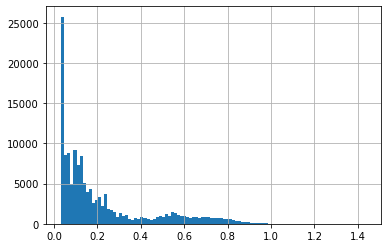

In [27]:
normal_df["score"].hist(bins = 100)

<AxesSubplot:>

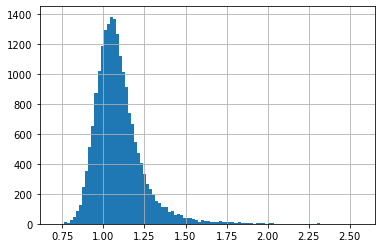

In [28]:
synthetic_data["score"].hist(bins = 100)

In [30]:
attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [31]:
data_vector = processed_attack.values
pred = loaded_model.predict(data_vector)

score_list = []
for index, x in enumerate(pred):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred[index],data_vector[index])))
        
attack_df["score"] = score_list

<AxesSubplot:>

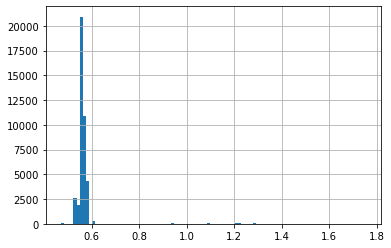

In [33]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
nmap_df["score"].hist(bins=100)

<AxesSubplot:>

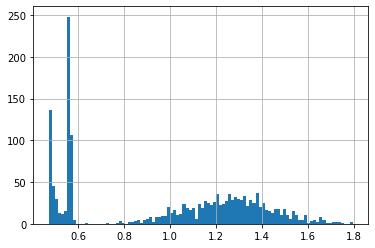

In [34]:
attack_word_df = attack_df[attack_df["ip.dst"] == '89.100.107.147']
attack_word_df["score"].hist(bins=100)

In [155]:
new_df = attack_df.copy()

In [156]:
from datetime import datetime
resampled_time = new_df['timestamp'].apply(lambda x:datetime.fromtimestamp(x))

In [157]:
resampled_time_series = pd.to_datetime(resampled_time, format='%Y-%m-%d %H:%M:%S')

In [158]:
df = pd.DataFrame(resampled_time_series)
df['packet'] = 1

In [159]:
df = df.set_index('timestamp')

In [160]:
df = df.resample('1S').sum()

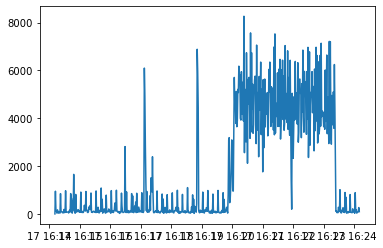

In [161]:
import matplotlib.pyplot as plt

plt.plot(df['packet'])

In [162]:
new_normal = normal_df.copy()

In [163]:
from datetime import datetime
resampled_time_normal = new_normal['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
resampled_time_series_normal = pd.to_datetime(resampled_time_normal, format='%Y-%m-%d %H:%M:%S')
df_nor = pd.DataFrame(resampled_time_series_normal)
df_nor['packet'] = 1
df_nor = df_nor.set_index('timestamp')
df_nor = df_nor.resample('1S').sum()

In [164]:
df_nor = df_nor.reset_index(drop=True)

In [165]:
df = df.reset_index(drop = True)

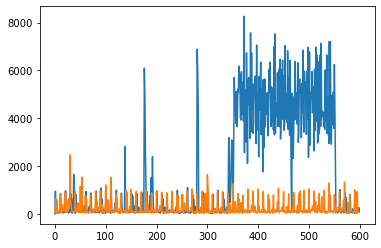

In [166]:
plt.plot(list(df['packet']))
plt.plot(list(df_nor['packet']))
plt.show()

In [173]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05), verbose = 2)

In [174]:
model.fit(np.array(list(df_nor['packet'])).reshape(-1,1))

Building estimator 1 of 100 for this parallel run (total 100)...
Building estimator 2 of 100 for this parallel run (total 100)...
Building estimator 3 of 100 for this parallel run (total 100)...
Building estimator 4 of 100 for this parallel run (total 100)...
Building estimator 5 of 100 for this parallel run (total 100)...
Building estimator 6 of 100 for this parallel run (total 100)...
Building estimator 7 of 100 for this parallel run (total 100)...
Building estimator 8 of 100 for this parallel run (total 100)...
Building estimator 9 of 100 for this parallel run (total 100)...
Building estimator 10 of 100 for this parallel run (total 100)...
Building estimator 11 of 100 for this parallel run (total 100)...
Building estimator 12 of 100 for this parallel run (total 100)...
Building estimator 13 of 100 for this parallel run (total 100)...
Building estimator 14 of 100 for this parallel run (total 100)...
Building estimator 15 of 100 for this parallel run (total 100)...
Building estimator 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


IsolationForest(contamination=0.05, verbose=2)

In [175]:
prediction = model.predict(np.array(list(df['packet'])).reshape(-1,1))

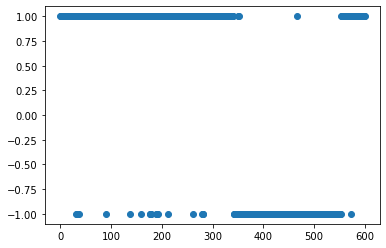

In [176]:
plt.scatter(x = [x for x in range(len(prediction))], y = prediction)
plt.show()

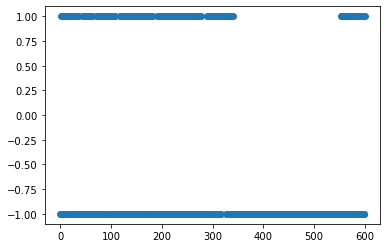

In [180]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1).fit(np.array(list(df_nor['packet'])).reshape(-1,1))
predi = clf.predict(np.array(list(df['packet'])).reshape(-1,1))
plt.scatter(x = [x for x in range(len(predi))], y = predi)
plt.show()

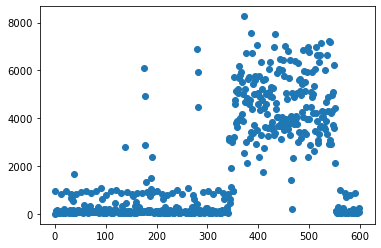

In [183]:
plt.scatter(x = [x for x in range(len(df['packet']))],y= list(df['packet']))

In [206]:
outlier_index = np.where(prediction==-1)
outlier_index = outlier_index[0].tolist()

In [212]:
actual_list = list(df['packet'])

outlier_list = []
for index in range(len(actual_list)):
    if index in list(outlier_index):
        outlier_list.append(actual_list[index])
    else:
        outlier_list.append(-2000)

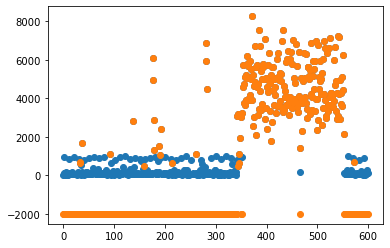

In [213]:
plt.scatter(x = [x for x in range(len(df['packet']))],y= list(df['packet']))
plt.scatter(x = [x for x in range(len(df['packet']))], y = outlier_list)
plt.show()